In [12]:
# Import the required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path

In [13]:
# Read the aapl.csv file into a Pandas DataFrame
# Set the date column as the DateTimeIndex
aapl_df = pd.read_csv(
    Path("../Resources/aapl.csv"),
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True
)

# Review the DataFrame
aapl_df.head()

,close,volume,open,high,low
date,,,,,
2014-09-22,101.06,52421660,101.80,102.14,100.58
2014-09-23,102.64,63255860,100.60,102.94,100.54
2014-09-24,101.75,59974260,102.16,102.85,101.20
2014-09-25,97.87,99689300,100.51,100.71,97.72
2014-09-26,100.75,62276770,98.53,100.75,98.40


In [14]:
signals_df = aapl_df.loc[:,["close"]]
signals_df

,close
date,
2014-09-22,101.06
2014-09-23,102.64
2014-09-24,101.75
2014-09-25,97.87
2014-09-26,100.75
...,...
2019-09-13,218.75
2019-09-16,219.90
2019-09-17,220.70


<AxesSubplot:xlabel='date'>

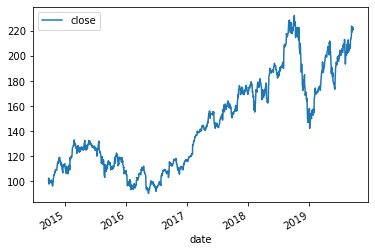

In [15]:
signals_df.plot()

In [19]:
short_window = 50
long_window = 100 

signals_df["SMA50"] = signals_df["close"].rolling(window=short_window).mean()
signals_df["SMA100"] = signals_df["close"].rolling(window=long_window).mean()

signals_df["Signal"] = 0.0
#
signals_df["Signal"] = np.where(signals_df["SMA50"] > signals_df["SMA100"], 1.0,0.0)

signals_df["Entry/Exit"] = signals_df["Signal"].diff()

signals_df.loc["2015-02-09":"2015-02-17"]

,close,SMA50,SMA100,Signal,Entry/Exit
date,,,,,
2015-02-09,119.72,112.7846,NaN,0.0,0.0
2015-02-10,122.02,112.8450,NaN,0.0,0.0
2015-02-11,124.88,112.9640,NaN,0.0,0.0
2015-02-12,126.46,113.1918,109.71095,1.0,1.0
2015-02-13,127.08,113.4408,109.97115,1.0,0.0
2015-02-17,127.83,113.6788,110.22305,1.0,0.0


In [21]:
# Visualize exit position relative to close price
exit = signals_df[signals_df['Entry/Exit'] == -1.0]['close'].hvplot.scatter(
  color='red',
  marker='v',
  size=200,
  legend=False,
  ylabel='Price in $',
  width=1000,
  height=400)

# Show the plot
exit

:Scatter   [date]   (close)

In [23]:
# Visualize entry position relative to close price
entry = signals_df[signals_df['Entry/Exit'] == 1.0]['close'].hvplot.scatter(
    color='green',
    marker="^",
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400)

# Show the plot
entry

:Scatter   [date]   (close)

In [24]:
# Visualize close price for the investment
security_close = signals_df[['close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400)

# Show the plot
security_close

:Curve   [date]   (close)

In [25]:
# Visualize moving averages
moving_avgs = signals_df[['SMA50', 'SMA100']].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400)

# Show the plot
moving_avgs

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [26]:
entry_exit_plot = security_close * moving_avgs * entry * exit

entry_exit_plot.opts(title = "Apple")

:Overlay
   .Curve.I          :Curve   [date]   (close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [date]   (value)
   .Scatter.Close.I  :Scatter   [date]   (close)
   .Scatter.Close.II :Scatter   [date]   (close)